# Wstęp

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
%matplotlib inline

'''
%matplotlib inline  - pozwala na rysowanie wykresów w notatniku
'''

'\n%matplotlib inline  - pozwala na rysowanie wykresów w notatniku\n'

In [2]:
bar = pd.read_csv('http://piotrdomagala.pl/data/weather_barcelona.csv', index_col='Date')
rom = pd.read_csv('http://piotrdomagala.pl/data/weather_rome.csv', index_col='Date')
ams = pd.read_csv('http://piotrdomagala.pl/data/weather_amsterdam.csv', index_col='Date')

In [3]:
temp_max = pd.DataFrame(index=bar.index)
temp_max['Barcelona'] = bar['TempMax']
temp_max['Rome'] = rom['TempMax']
temp_max['Amsterdam'] = ams['TempMax']

In [4]:
temp_max.head()

,Barcelona,Rome,Amsterdam
Date,,,
2018-01-01,17,14,8
2018-01-02,19,13,9
2018-01-03,23,14,11
2018-01-04,24,16,11
2018-01-05,20,17,8


In [5]:
def GradeDay(row):
    if(row['TempMax'] >= row['AvgTempMax']):
        return 'PLUS'
    else:
        return 'MINUS'

In [6]:
cities3 = pd.DataFrame(index=['MINUS','PLUS'])
cities3['Barcelona'] = bar['GradeDay'].value_counts()
cities3['Rome'] = rom['GradeDay'].value_counts()
cities3['Amsterdam'] = ams['GradeDay'].value_counts()

KeyError: KeyError: 'GradeDay'

In [7]:
cities3

""
MINUS
PLUS


In [8]:
cities3['Barcelona'].plot(kind='bar')

KeyError: KeyError: 'Barcelona'

In [9]:
cities3['Barcelona'].plot(kind='barh')

# kind='barh' wykres poziomy

KeyError: KeyError: 'Barcelona'

In [10]:
cities3.plot(kind='barh')

TypeError: TypeError: no numeric data to plot

In [11]:
cities3.plot(kind='bar', stacked=True)

# stacked - nakładamy wartości słupkowe na siebie

TypeError: TypeError: no numeric data to plot

In [12]:
cities3.plot(kind='barh', stacked=True)

TypeError: TypeError: no numeric data to plot

<Axes: >

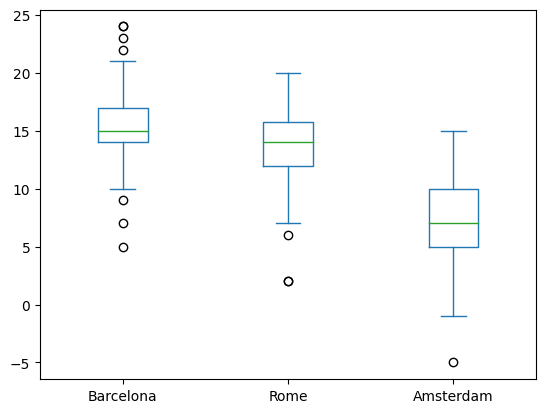

In [13]:
temp_max.plot(kind='box')

# zielona kreska - mediana dla serii danych
# wąsy górny i dolny - wartość max i min serii

In [14]:
color = dict(boxes='DarkGreen', whiskers='DarkOrange', medians='DarkBlue', caps='Gray')

<Axes: >

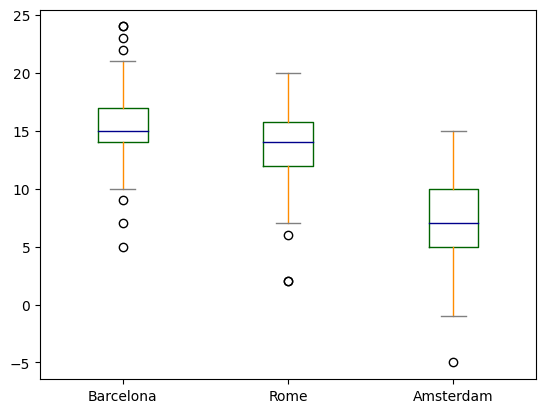

In [15]:
temp_max.plot(kind='box', color=color)

<Axes: ylabel='Frequency'>

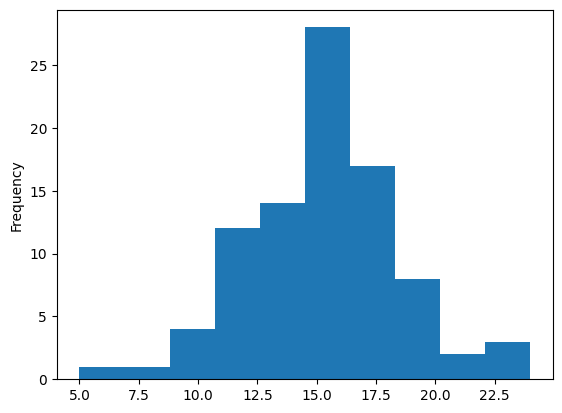

In [16]:
bar['TempMax'].plot(kind='hist')

In [17]:
bar['TempMax'].value_counts().sort_index()

5 1
7 1
9 1
10 3
11 4
12 8
13 4
14 10
15 17
16 11
17 9
18 8
19 4
20 4
21 1
22 1
23 1
24 2
Name: TempMax, dtype: int64

In [18]:
bar['TempMax'].nunique()

18

<Axes: ylabel='Frequency'>

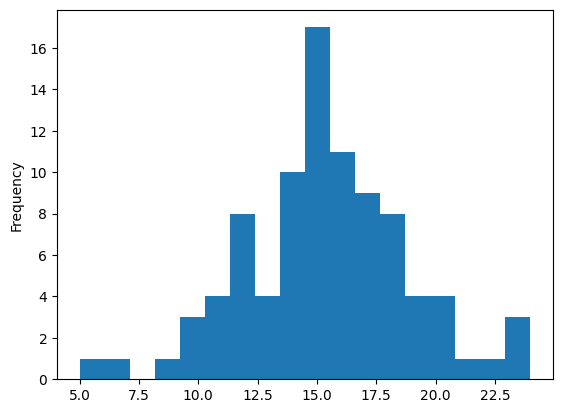

In [19]:
bar['TempMax'].plot(kind='hist', bins=18)

# bins - liczba słupków dla histogramu

# Zadanie

In [21]:
# check if '40K' column contains non numeric or incomplete values
def is_valid_time(x):
    try:
        pd.Timedelta(x)
        return True
    except:
        return False

# apply the function to the '40K' column
valid = marathon["40K"].apply(is_valid_time)

# replace invalid entries with NaN
marathon.loc[~valid, "40K"] = pd.NaT

# apply pd.Timedelta where it is possible
marathon["TimeSeconds"] = marathon["40K"].apply(lambda x: pd.Timedelta(x).total_seconds() if pd.notnull(x) else np.nan)

# next steps are identical to the original cell
groupMF = marathon[ marathon["Country"].isin(["USA","CAN"]) ].groupby(by=["Country","M/F"])
groupMF = groupMF.agg({"TimeSeconds": ["mean"]})
groupMF = groupMF.unstack()
groupMF.columns = groupMF.columns.droplevel().droplevel()
groupMF

M/F,F,M
Country,,
CAN,13618.346012,12527.160190
USA,14188.759649,13004.157656


<Axes: ylabel='Country'>

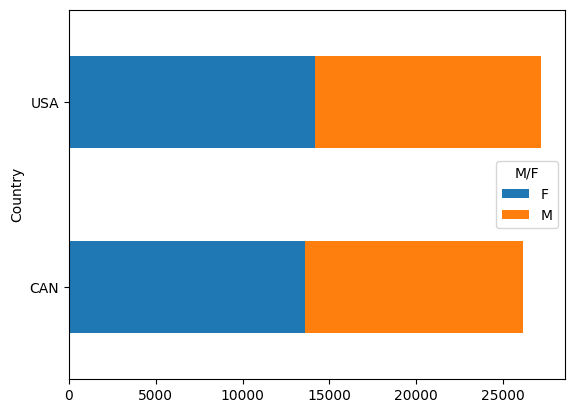

In [24]:
groupMF.plot(kind='barh',
             stacked=True)

In [27]:
age_data = marathon[marathon["Country"].isin(["USA"])]
age_data.head()

,Age,M/F,Country,40K,TimeSeconds
1,30,M,USA,2:03:14,7394.0
3,32,M,USA,2:04:35,7475.0
5,40,M,USA,2:05:21,7521.0
6,33,M,USA,2:05:41,7541.0
8,27,M,USA,2:07:17,7637.0


<Axes: ylabel='Frequency'>

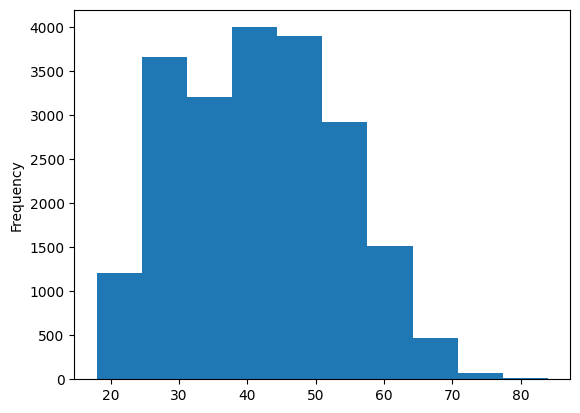

In [28]:
age_data['Age'].plot(kind='hist')

In [31]:
uniqe_age=age_data['Age'].nunique()

<Axes: ylabel='Frequency'>

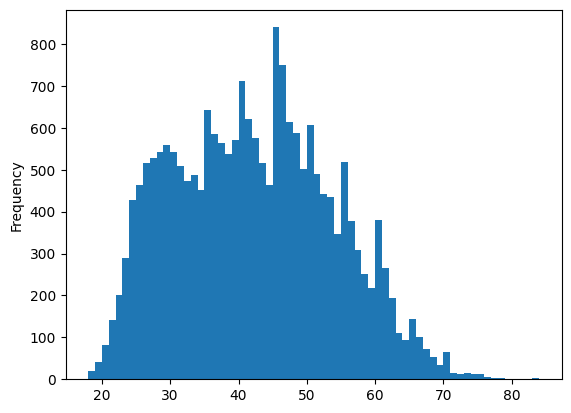

In [32]:
age_data['Age'].plot(kind='hist', bins=uniqe_age)

In [33]:
data_USA = marathon[ marathon["Country"].isin(["USA"]) ]
data_USA.head()

,Age,M/F,Country,40K,TimeSeconds
1,30,M,USA,2:03:14,7394.0
3,32,M,USA,2:04:35,7475.0
5,40,M,USA,2:05:21,7521.0
6,33,M,USA,2:05:41,7541.0
8,27,M,USA,2:07:17,7637.0


<Axes: >

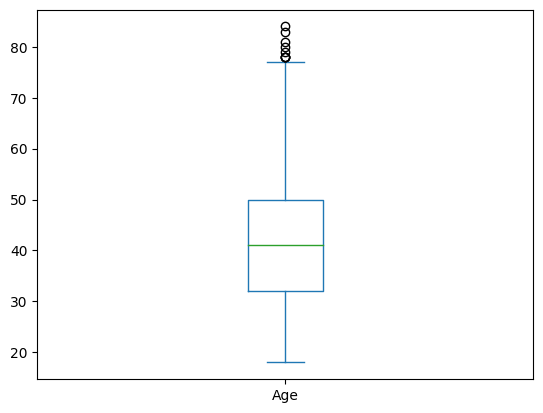

In [35]:
data_USA['Age'].plot(kind='box')

In [36]:
USA = marathon[ marathon["Country"].isin(["USA"]) ]["Age"]
CAN = marathon[ marathon["Country"].isin(["CAN"]) ]["Age"]
df = pd.DataFrame({'USA':USA, 'CAN':CAN})
df.head()

,USA,CAN
1,30.0,NaN
3,32.0,NaN
5,40.0,NaN
6,33.0,NaN
8,27.0,NaN


<Axes: >

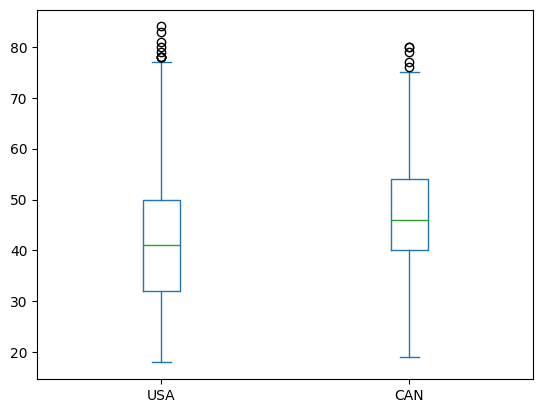

In [37]:
df.plot(kind='box')